In [225]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Q1 Delivery_time -> Predict delivery time using sorting time 

In [226]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [227]:
df.rename(columns={'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, inplace=True)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [228]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [229]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

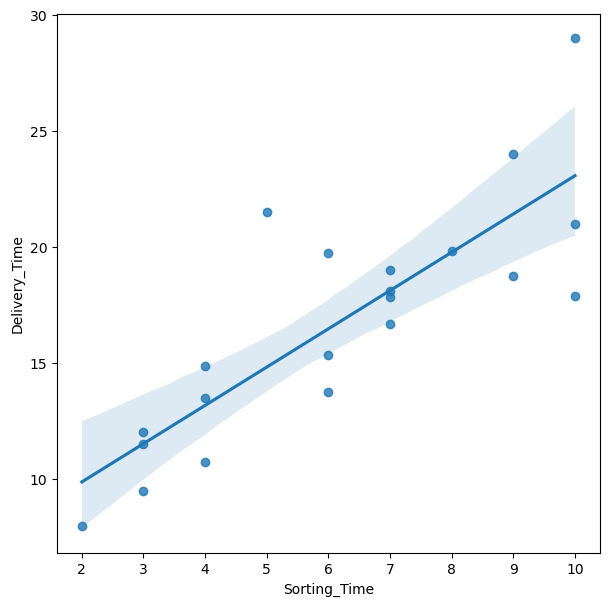

In [230]:
sns.regplot(x=df['Sorting_Time'], y=df['Delivery_Time'])

In [231]:
def plot_graphs(f1, f2):
    fig, ax = plt.subplots(2, 2)
    sns.histplot(f1, bins=10, kde=True, ax=ax[0, 0])
    sm.qqplot(f1, line='r', ax=ax[0, 1])
    sns.histplot(f2, bins=10, kde=True, ax=ax[1, 0])
    sm.qqplot(f2, line='r', ax=ax[1, 1])
    ax[0, 0].set_title('Delivery Time Histogram')
    ax[0, 1].set_title('Delivery Time QQ Plot')
    ax[1, 0].set_title('Sorting Time Histogram')
    ax[1, 1].set_title('Sorting Time QQ Plot')
    plt.rcParams['figure.figsize'] = (7, 7)
    plt.tight_layout()

In [232]:
def res_fit(predt, resid):
    plt.scatter(predt, resid, c='r')
    plt.hlines(y=0, xmin=0, xmax=30)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

## Model without any transformation

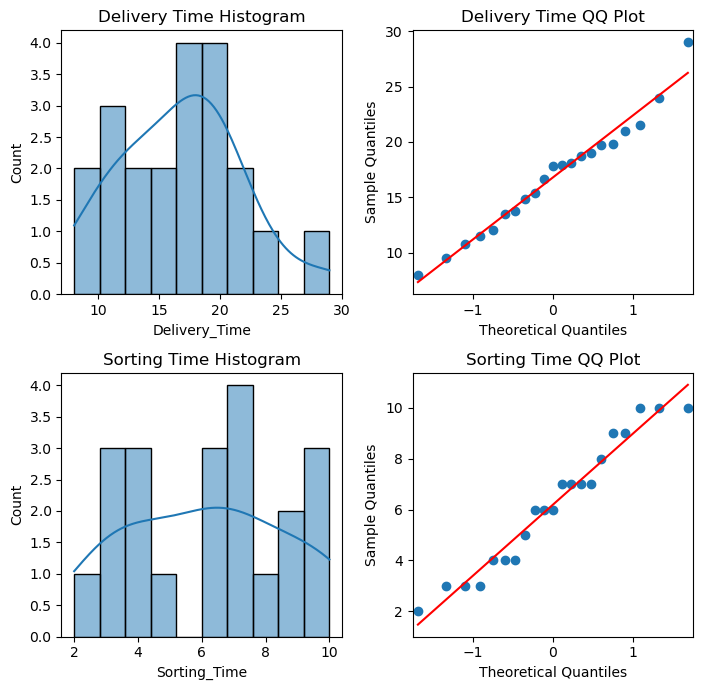

In [233]:
plot_graphs(df['Delivery_Time'], df["Sorting_Time"])

### We can see from the above histogram and QQ plot that the distribution is not normal

In [234]:
model = LinearRegression()
model.fit(df[['Sorting_Time']], df['Delivery_Time'])
model.coef_, model.intercept_

(array([1.6490199]), 6.58273397199706)

In [235]:
pred = model.predict(df[["Sorting_Time"]])
pred

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [236]:
score = model.score(df[['Sorting_Time']], df['Delivery_Time'])
score

0.6822714748417231

In [237]:
residuals = pred-df['Delivery_Time']
residuals

0     2.072933
1    -0.321186
2    -3.273147
3    -2.576087
4    -5.927067
5     1.126853
6    -0.874127
7     2.029794
8     5.172933
9     2.673913
10   -0.055107
11    2.428814
12    1.445873
13    0.029794
14   -0.500206
15   -1.701186
16    2.726853
17    0.015873
18    1.880774
19    0.295873
20   -6.672167
Name: Delivery_Time, dtype: float64

In [238]:
rmse = np.sqrt(np.mean(residuals**2))
rmse

2.791650327061766

#### Residual vs Fitted values

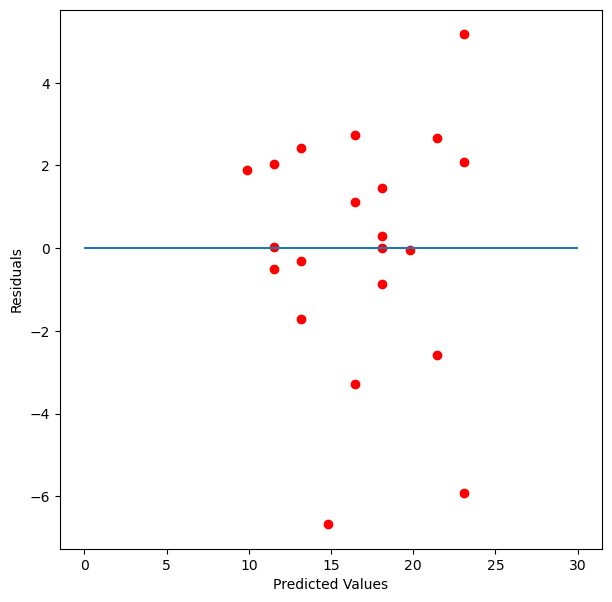

In [239]:
res_fit(pred, residuals)

### Checking normal distribution of residuals

<AxesSubplot:xlabel='Delivery_Time', ylabel='Count'>

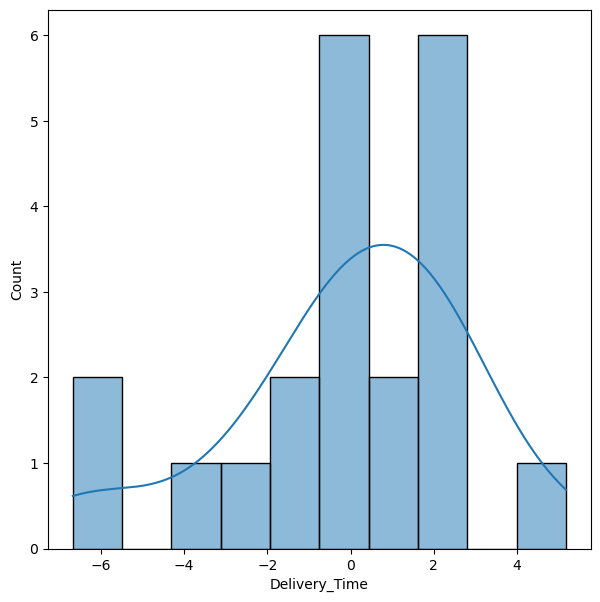

In [240]:
sns.histplot(residuals, bins=10, kde=True)

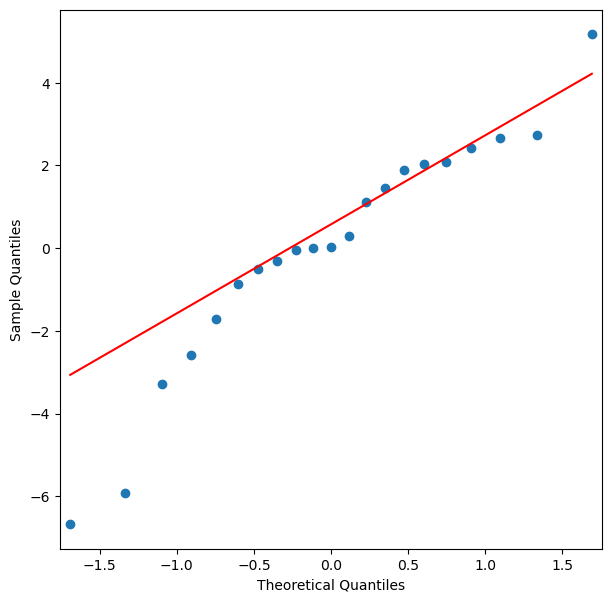

In [241]:
sm.qqplot(residuals, line='q')
plt.show()

### We can see that the residuals are also not normally distributed
## We can do transformation to get better R-Squared value and lower RMSE value

### Applying log transformation on the model

In [242]:
df['Sorting_Time_lg'] = np.log(df["Sorting_Time"])
df['Delivery_Time_lg'] = np.log(df['Delivery_Time'])

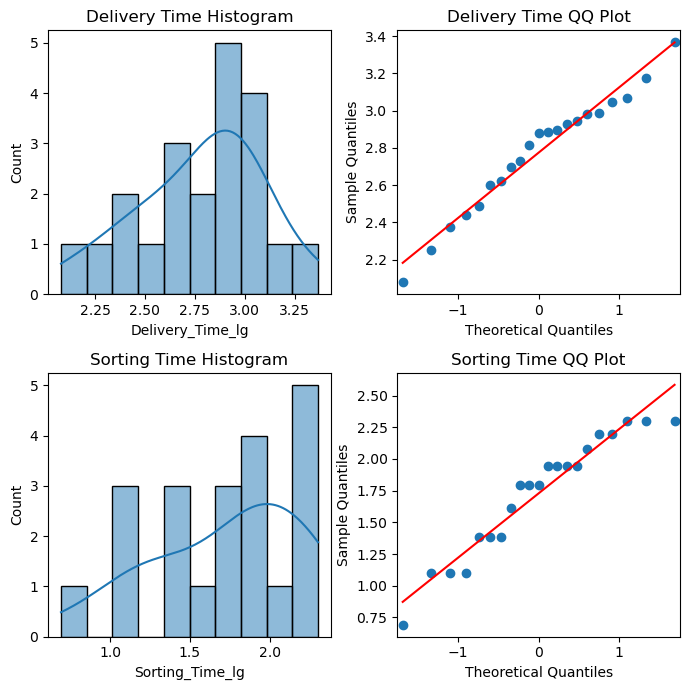

In [243]:
plot_graphs(df['Delivery_Time_lg'], df['Sorting_Time_lg'])

In [244]:
model1 = LinearRegression()
model1.fit(df[['Sorting_Time_lg']], df['Delivery_Time_lg'])
pred1 = model1.predict(df[['Sorting_Time_lg']])
np.exp(pred1)

array([22.59736023, 13.07012281, 16.65321647, 21.2185932 , 22.59736023,
       16.65321647, 18.25998132, 11.00591067, 22.59736023, 21.2185932 ,
       19.77660832, 13.07012281, 18.25998132, 11.00591067, 11.00591067,
       13.07012281, 16.65321647, 18.25998132,  8.63788712, 18.25998132,
       14.93432385])

In [245]:
score1 = model1.score(df[['Sorting_Time_lg']], df['Delivery_Time_lg'])
score1

0.77216134926874

In [246]:
residuals1 = np.exp(pred1) - df['Delivery_Time']
residuals1

0     1.597360
1    -0.429877
2    -3.096784
3    -2.781407
4    -6.402640
5     1.303216
6    -0.740019
7     1.505911
8     4.697360
9     2.468593
10   -0.053392
11    2.320123
12    1.579981
13   -0.494089
14   -1.024089
15   -1.809877
16    2.903216
17    0.149981
18    0.637887
19    0.429981
20   -6.565676
Name: Delivery_Time, dtype: float64

In [247]:
rmse1 = np.sqrt(np.mean((residuals1)**2))
rmse1

2.745828897614549

#### Residuals vs Fitted Values

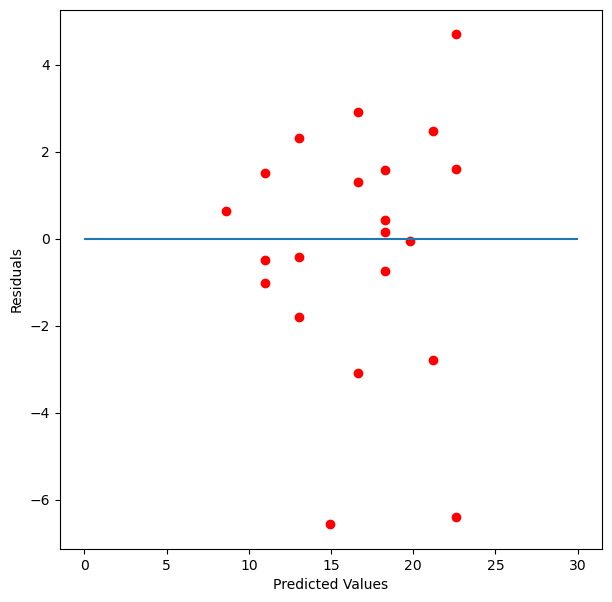

In [276]:
res_fit(np.exp(pred1), residuals1)

### Checking normal distribution of residuals

<AxesSubplot:xlabel='Delivery_Time', ylabel='Count'>

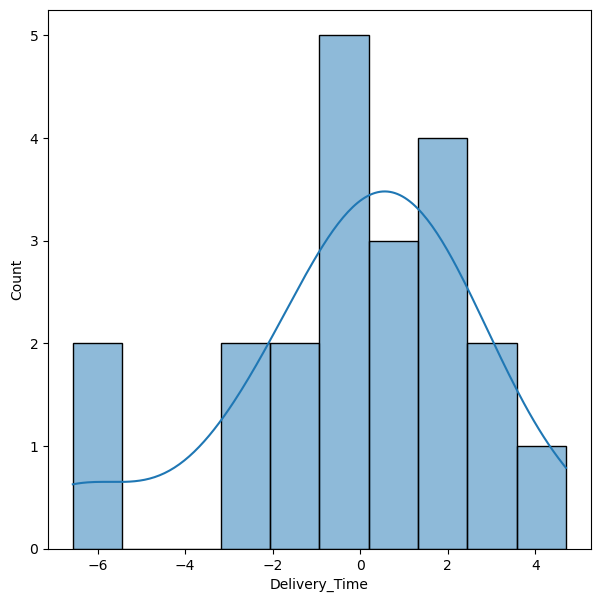

In [249]:
sns.histplot(residuals1, bins=10, kde=True)

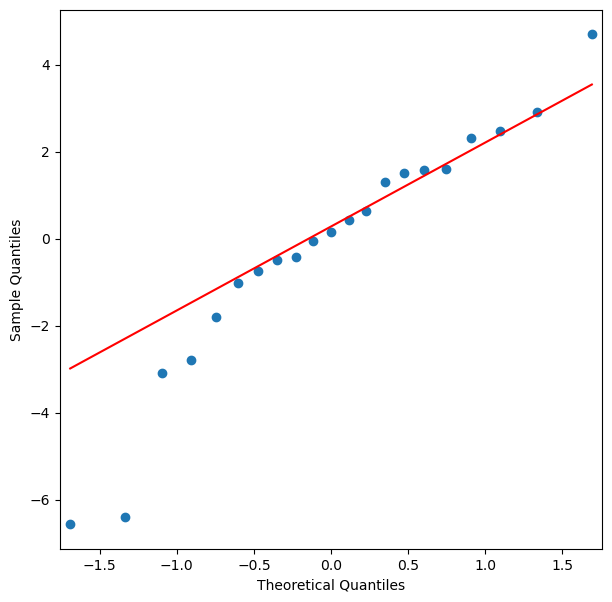

In [250]:
sm.qqplot(residuals1, line='q')
plt.show()

### Applying Quadratic transformation

In [251]:
df = df[['Delivery_Time', 'Sorting_Time']]
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [252]:
df.loc[:, "Sorting_Time_sq"] = df['Sorting_Time']**2
df

,Delivery_Time,Sorting_Time,Sorting_Time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


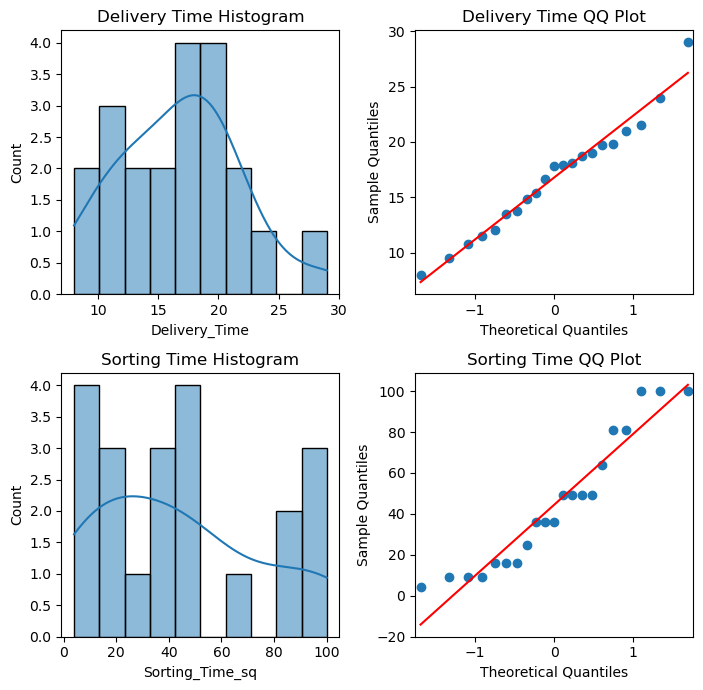

In [253]:
plot_graphs(df['Delivery_Time'], df['Sorting_Time_sq'])

In [254]:
model2 = LinearRegression()
model2.fit(df[['Sorting_Time_sq', 'Sorting_Time']], df["Delivery_Time"])
pred2 = model2.predict(df[['Sorting_Time_sq', 'Sorting_Time']])
pred2

array([22.33242955, 13.28306918, 17.04510832, 21.29019387, 22.33242955,
       17.04510832, 18.64653326, 11.12245499, 22.33242955, 21.29019387,
       20.06156177, 13.28306918, 18.64653326, 11.12245499, 11.12245499,
       13.28306918, 17.04510832, 18.64653326,  8.77544437, 18.64653326,
       15.25728696])

In [255]:
score2 = model2.score(df[['Sorting_Time_sq', 'Sorting_Time']], df["Delivery_Time"])
score2

0.6934396274520247

In [256]:
residuals2 = pred2 - df["Delivery_Time"]
residuals2

0     1.332430
1    -0.216931
2    -2.704892
3    -2.709806
4    -6.667570
5     1.695108
6    -0.353467
7     1.622455
8     4.432430
9     2.540194
10    0.231562
11    2.533069
12    1.966533
13   -0.377545
14   -0.907545
15   -1.596931
16    3.295108
17    0.536533
18    0.775444
19    0.816533
20   -6.242713
Name: Delivery_Time, dtype: float64

In [257]:
rmse2 = np.sqrt(np.mean(residuals2**2))
rmse2

2.7421482037801224

### Residuals vs Fitted values

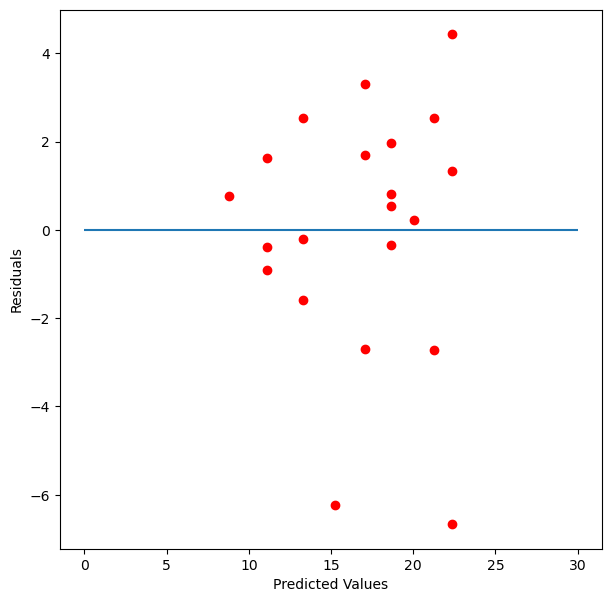

In [258]:
res_fit(pred2, residuals2)

### Checking normal distribution of residuals

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

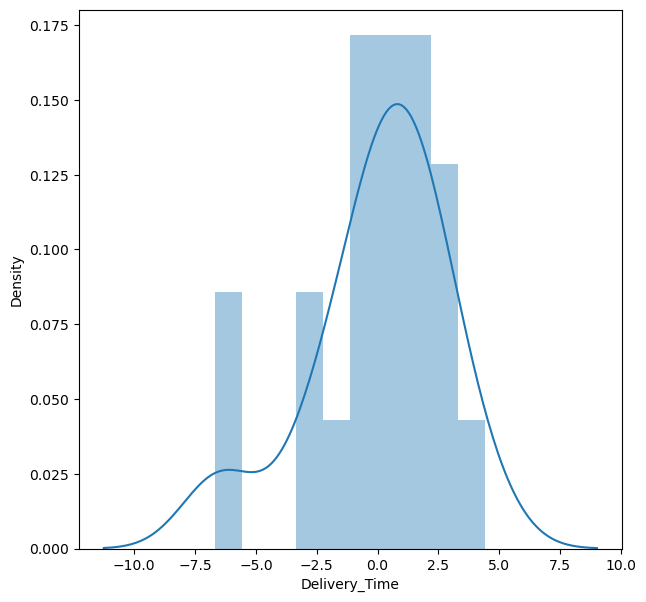

In [259]:
sns.distplot(residuals2, bins=10, kde=True)

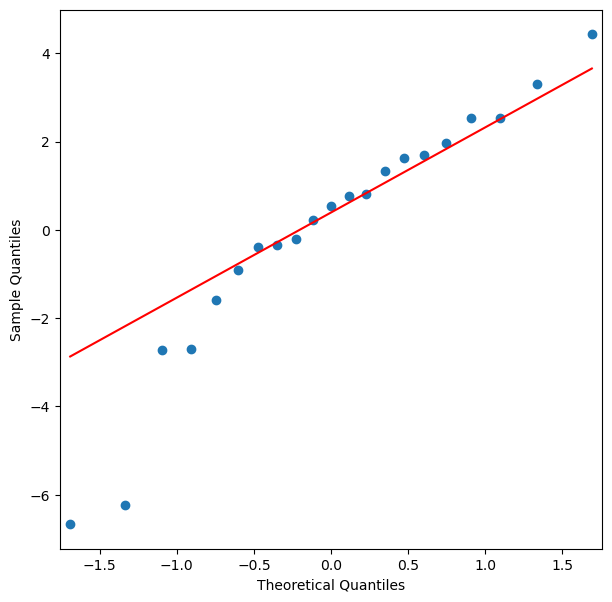

In [260]:
sm.qqplot(residuals2, line='q')
plt.show()

### Applying Square root transformation

In [261]:
df = df[['Delivery_Time', 'Sorting_Time']]
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [262]:
df['Delivery_Time_sqrt'] = df['Delivery_Time']**0.5
df

,Delivery_Time,Sorting_Time,Delivery_Time_sqrt
0,21.00,10,4.582576
1,13.50,4,3.674235
2,19.75,6,4.444097
3,24.00,9,4.898979
4,29.00,10,5.385165
5,15.35,6,3.917908
6,19.00,7,4.358899
7,9.50,3,3.082207
8,17.90,10,4.230839
9,18.75,9,4.330127


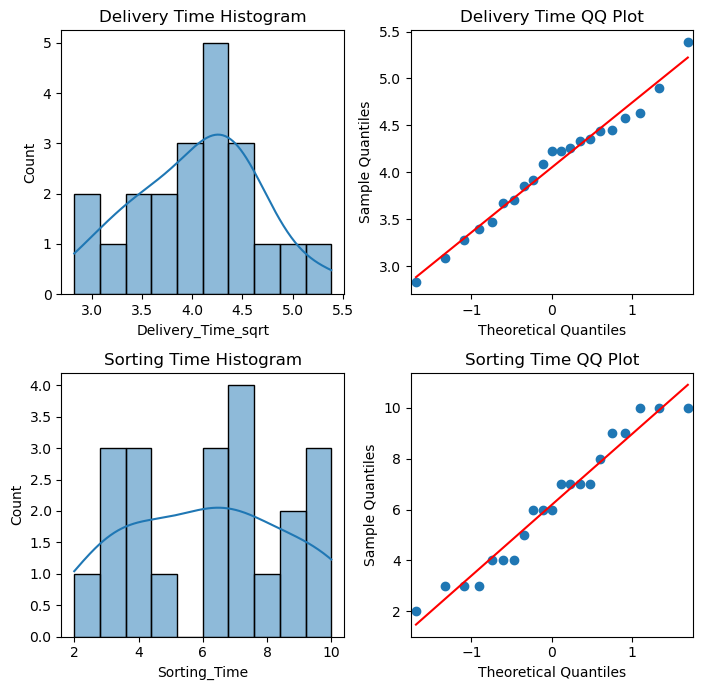

In [263]:
plot_graphs(df['Delivery_Time_sqrt'], df['Sorting_Time'])

In [264]:
model3 = LinearRegression()
model3.fit(df[['Sorting_Time']], df['Delivery_Time_sqrt'])
pred3 = model3.predict(df[['Sorting_Time']])
pred3**2

array([23.41639735, 12.95466039, 16.10033238, 21.45929098, 23.41639735,
       16.10033238, 17.8012585 , 11.50991452, 23.41639735, 21.45929098,
       19.58757803, 12.95466039, 17.8012585 , 11.50991452, 11.50991452,
       12.95466039, 16.10033238, 17.8012585 , 10.15056207, 17.8012585 ,
       14.48479968])

In [265]:
score3 = model3.score(df[['Sorting_Time']], df["Delivery_Time_sqrt"])
score3

0.704049871541756

In [266]:
residuals3 = pred3**2 - df['Delivery_Time']
residuals3

0     2.416397
1    -0.545340
2    -3.649668
3    -2.540709
4    -5.583603
5     0.750332
6    -1.198742
7     2.009915
8     5.516397
9     2.709291
10   -0.242422
11    2.204660
12    1.121258
13    0.009915
14   -0.520085
15   -1.925340
16    2.350332
17   -0.308742
18    2.150562
19   -0.028742
20   -7.015200
Name: Delivery_Time, dtype: float64

In [267]:
rmse3 = np.sqrt(np.mean(residuals3**2))
rmse3

2.8494869914815193

### Residuals vs Fitted values

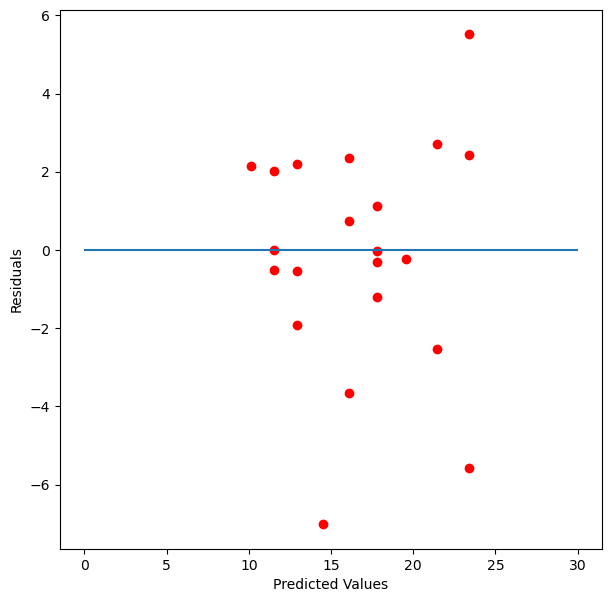

In [277]:
res_fit(pred3**2, residuals3)

### Checking normal distribution of residuals

<AxesSubplot:xlabel='Delivery_Time', ylabel='Count'>

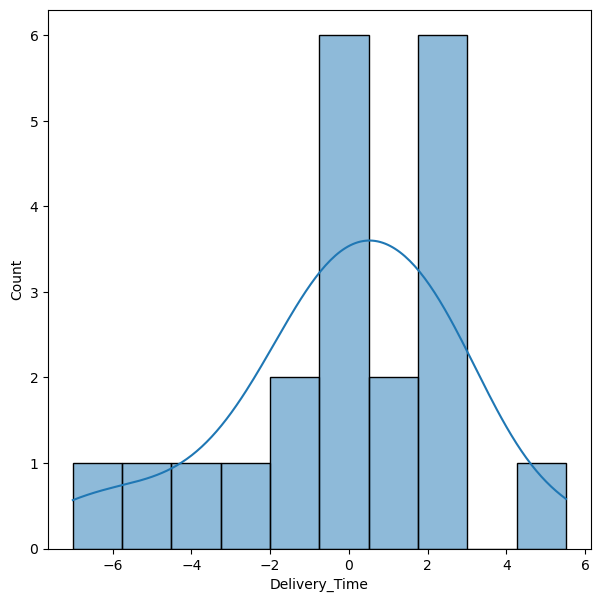

In [269]:
sns.histplot(residuals3, bins=10, kde=True)

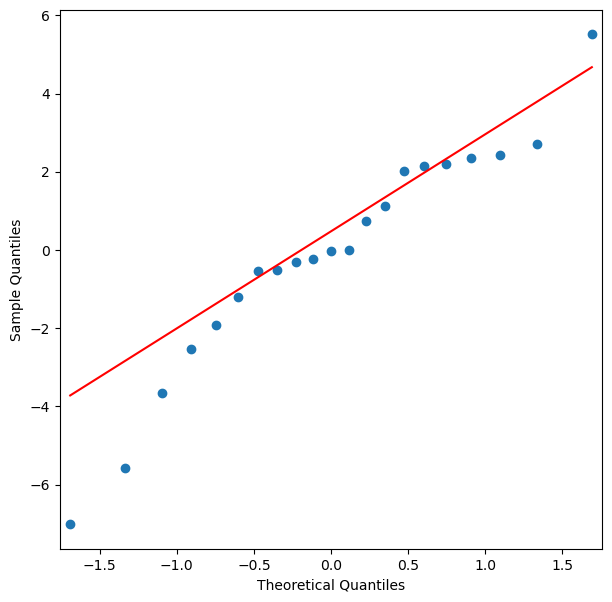

In [270]:
sm.qqplot(residuals3, line='q')
plt.show()

## Comparing RMSE and R-squared values of different models

In [271]:
metric_df = pd.DataFrame({'RMSE':[rmse, rmse1, rmse2, rmse3], 
                          'R-Squared':[score, score1, score2, score3]}, 
                         index=[
                             'model (No transformation)', 
                             'model1 (Log transformation)', 
                             'model2 (Quadratic transformation)', 
                             'model3 (Sqrt tranformation)'], )
metric_df

,RMSE,R-Squared
model (No transformation),2.791650,0.682271
model1 (Log transformation),2.745829,0.772161
model2 (Quadratic transformation),2.742148,0.693440
model3 (Sqrt tranformation),2.849487,0.704050


In [272]:
metric_df['R-Squared'].idxmax()

'model1 (Log transformation)'

#### We can see that model1 has the highest R-Squared value so we'll be using model1 for prediction

In [273]:
log_model = df.drop(columns='Delivery_Time_sqrt')
log_model

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Predicting values with log transformation model

In [274]:
log_model['Predicted_Delivery_Time'] = np.exp(pred1)
log_model

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time
0,21.00,10,22.597360
1,13.50,4,13.070123
2,19.75,6,16.653216
3,24.00,9,21.218593
4,29.00,10,22.597360
5,15.35,6,16.653216
6,19.00,7,18.259981
7,9.50,3,11.005911
8,17.90,10,22.597360
9,18.75,9,21.218593


## Prediciting values with the original model

In [275]:
original_model = df[['Delivery_Time', 'Sorting_Time']]
original_model['Predicted_delivery_Time'] = pred
original_model

,Delivery_Time,Sorting_Time,Predicted_delivery_Time
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913
